# AI For Healthcare
# Exercise 1: CT Reconstruction

## Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale
import time

## Step 1:
* Create a head phantom or use the Shepp-Logan head phantom. The bright ellipse corresponds to the skull and the structures inside correspond to the various brain tissues and lesions.  
* Calculate the synthetic projection using radon transform (parallel beam geometry) for the head phantom and the geometric images and explain your results.

In [4]:
# get image 
image = shepp_logan_phantom()

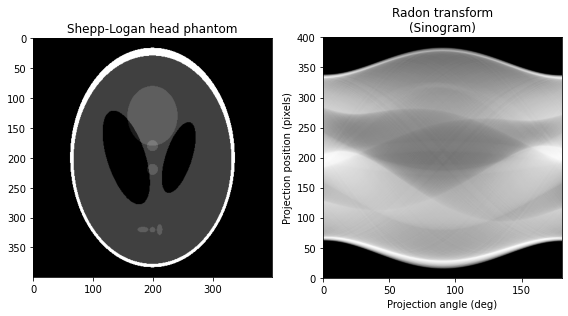

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

# Generate a plot for the original
ax1.set_title("Shepp-Logan head phantom")
ax1.imshow(image, cmap=plt.cm.Greys_r)

# Generate the sinogram
theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta)
dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')

fig.tight_layout()
plt.show()

## Step 2: 
* Vary the number of projection angles (18,24,90,... ) and perform a reconstruction for each angle increment. 
* Explain the effect of varying the angles.

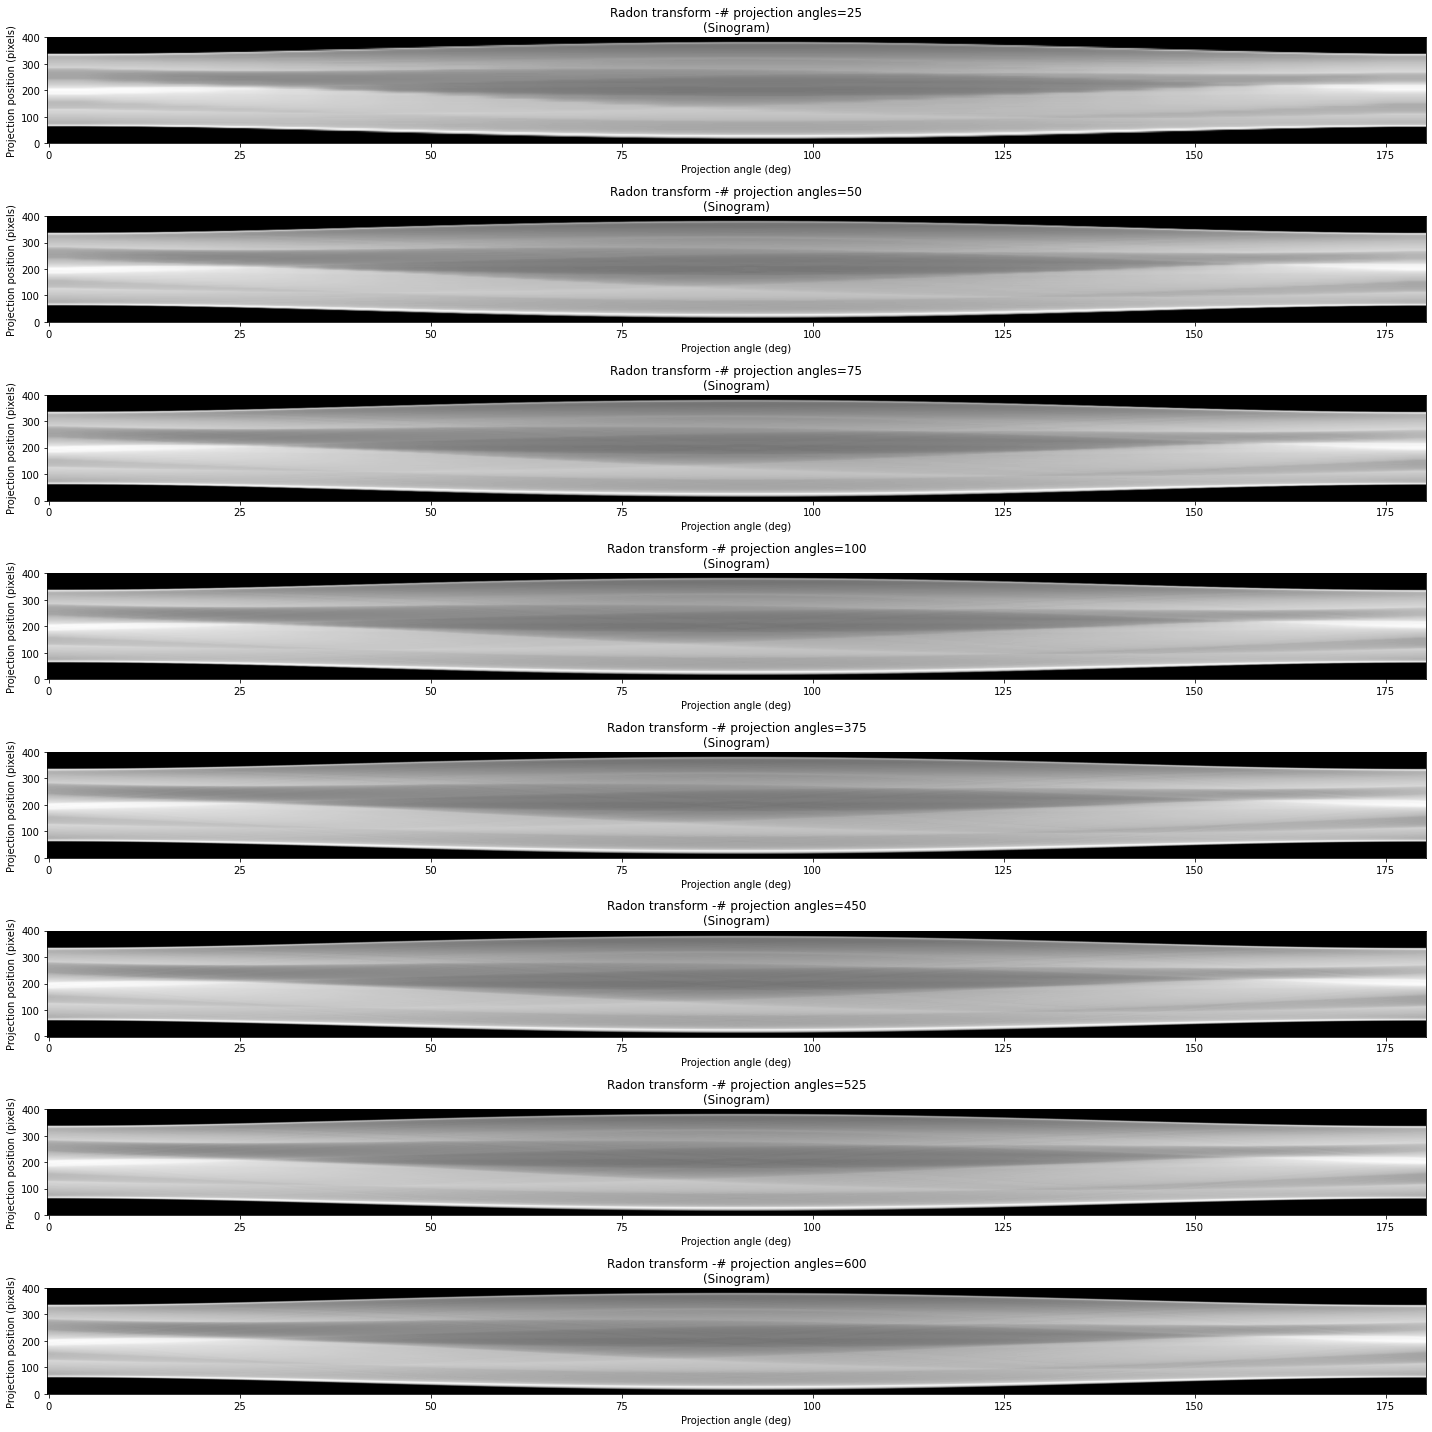

In [12]:
fig, ax = plt.subplots(8, 1, figsize=(20, 20))
time_list = [] 
amount_of_projection_angles_list = []
for figure_idx in range(0,8):
    # define amount_of_projection_angles
    if figure_idx<4:
        amount_of_projection_angles =  int(0.5*(figure_idx+1)*(max(image.shape)//ax.shape[0]))
    else:
        amount_of_projection_angles =  int(1.5*(figure_idx+1)*(max(image.shape)//ax.shape[0]))
    amount_of_projection_angles_list.append(amount_of_projection_angles)
    
    # create the sinogram (document how long it took)
    theta = np.linspace(0., 180., amount_of_projection_angles, endpoint=False)
    t1 = time.time()
    sinogram = radon(image, theta=theta)
    radon_time  =  np.round(time.time()-t1,2)
    time_list.append(radon_time)
    
    # create the plot
    dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]
    plt.imshow(sinogram, cmap=plt.cm.Greys_r,
                extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
                aspect='auto')
    ax[figure_idx].set_title("Radon transform -# projection angles="+str(amount_of_projection_angles)+"\n(Sinogram)")
    ax[figure_idx].set_xlabel("Projection angle (deg)")
    ax[figure_idx].set_ylabel("Projection position (pixels)")
    ax[figure_idx].imshow(sinogram, cmap=plt.cm.Greys_r,
                extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
                aspect='auto')

fig.tight_layout()
plt.show()



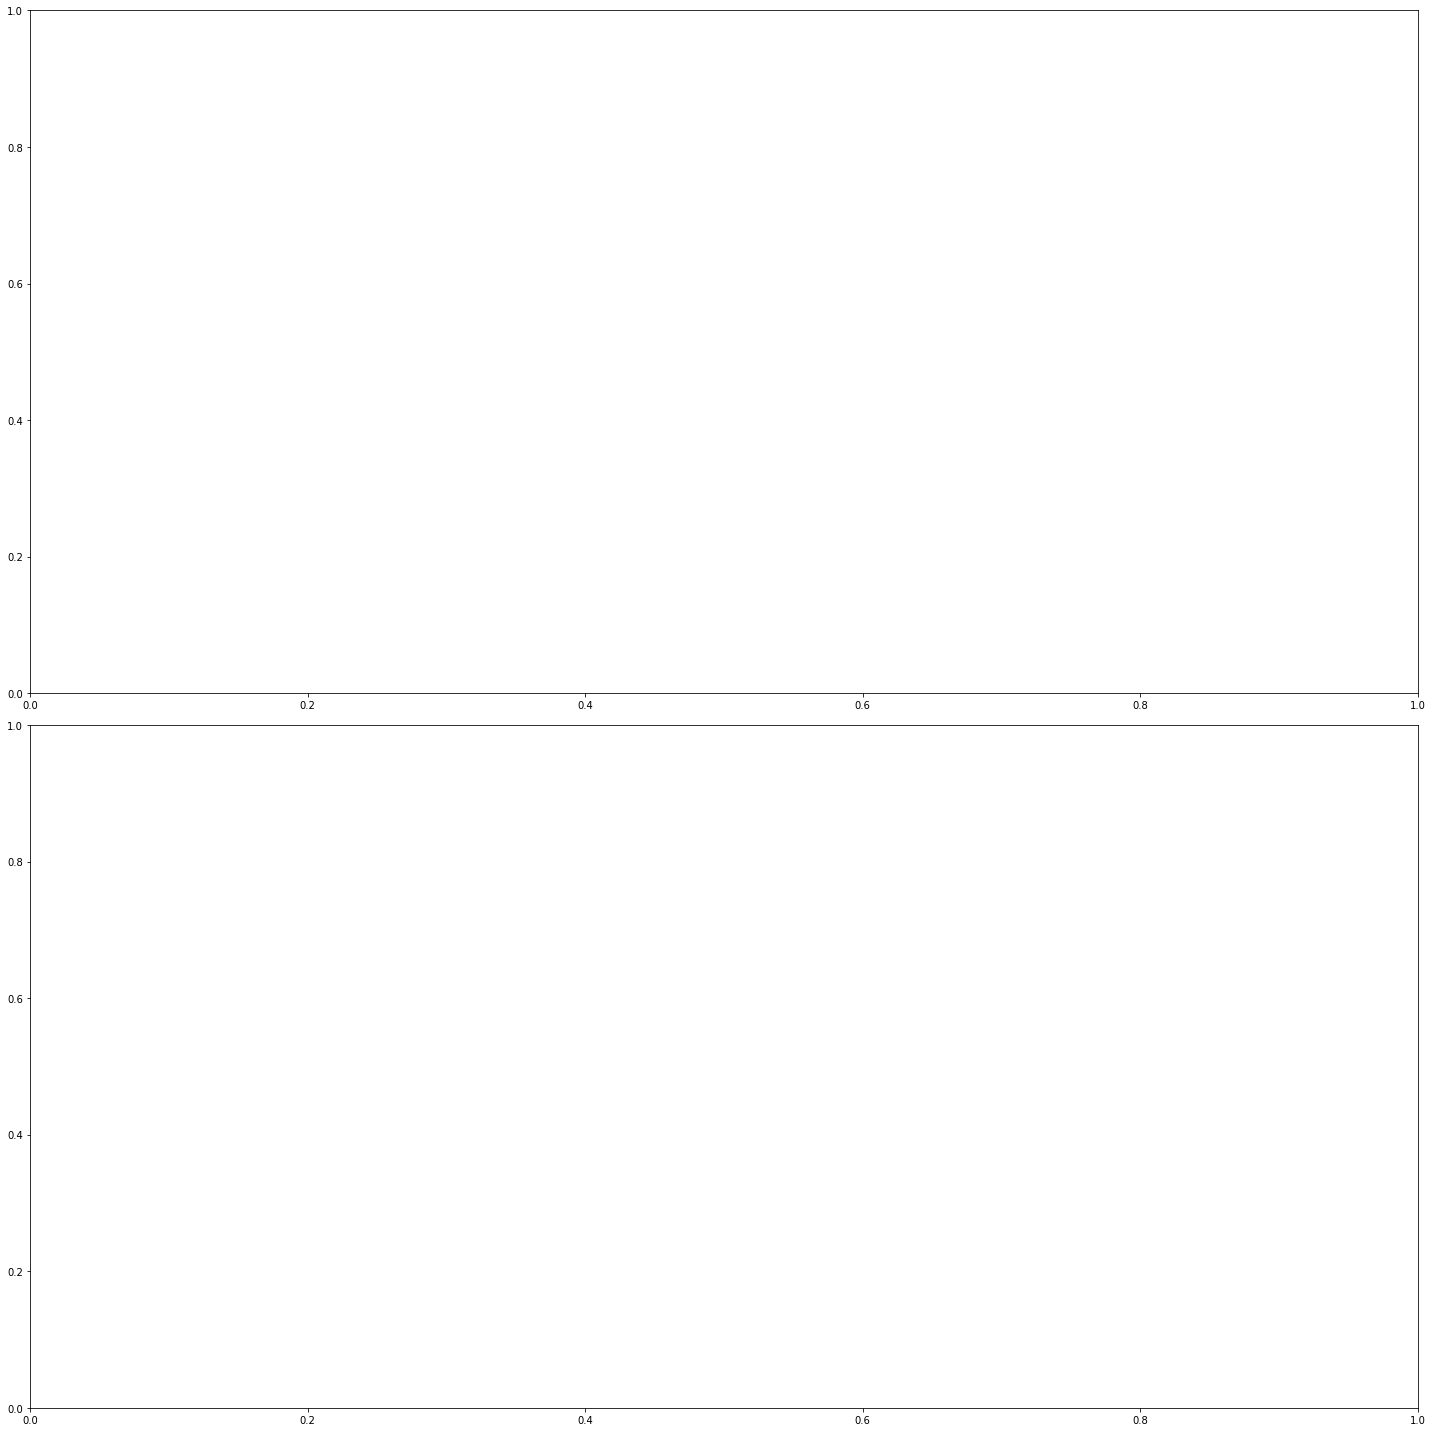

In [15]:
fig2, ax2 = plt.subplots(2, 1, figsize=(20, 20))
ax2[0] = ax[0]
ax2[1] = ax[7]
fig2.tight_layout()
plt.show()

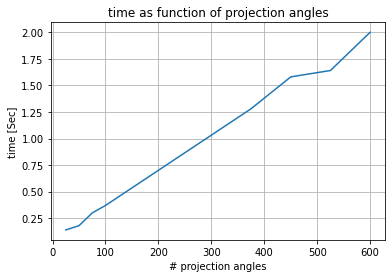

In [16]:
# Discuess change in run time according to number of projection angles
plt.figure()
plt.plot(amount_of_projection_angles_list, time_list)
plt.xlabel('# projection angles')
plt.ylabel('time [Sec]')
plt.grid()
plt.title('time as function of projection angles')
plt.show()

## Step 3: 
* Demonstrate the difference of performing back projection and filtered back projection. 

## Step 4: 
* Apply & describe an algebraic  iterative reconstruction technique such as SIRT/ CGLS/ another. 